## C2HO Meetup on Creative Machine Learning

### Self Organizing Maps

author: Stefano Fasciani, stefano.fasciani@imv.uio.no

credits: part of this code is adapted from the examples from https://bronwojtek.github.io/neuralnets-in-raw-python/docs/som.html

commented lines include simple parameters that can be changed to explore creative uses of the model 


In [1]:
import os
import glob
import imageio
from natsort import natsorted 
import numpy as np
import matplotlib.pyplot as plt               
from IPython.display import display, Image    
import matplotlib.cm as cm
import tensorflow_docs.vis.embed as embed

#### Some auxiliary functions

We do not use any python package for SOM, therefore in this notebook you will find the low level code training a SOM (which is fairly simple).

In [2]:
def phi(i,k,d):                       
    return np.exp(-(i-k)**2/(2*d**2)) 

def phi2(ix,iy,kx,ky,d):  
    return np.exp(-((ix-kx)**2+(iy-ky)**2)/(d**2))  

def rgbn():
    r,g,b=np.random.random(),np.random.random(),np.random.random() 
    norm=np.sqrt(r*r+g*g+b*b)                                      
    return np.array([r,g,b]/norm)                                  

def point_c():
    while True:
        x=np.random.random()
        y=np.random.random()
        if (x-0.5)**2+(y-0.5)**2 < 0.4**2:
            break
    return np.array([x,y])

def point():
    x=np.random.random()
    y=np.random.random()
    return np.array([x,y])

def eucl(p1,p2):

    return (p1[0]-p2[0])**2+(p1[1]-p2[1])**2

def dist3(p1,p2): 

    return (p1[0]-p2[0])**2+(p1[1]-p2[1])**2+(p1[2]-p2[2])**2

### 2D data and 1D grid example

#### Global settings

In [3]:
num_neurons = 100 # number of neurons
num_data = 100 # number of data points

#### Initializing and displyaing the random data

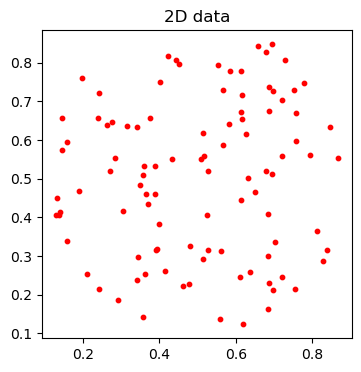

In [4]:
data = np.array([point_c() for i in range(num_data)])


# the commented code below creates and concatenates multiple groups of data points, you can change the constant numbers
# data = np.empty([0,2])
# temp = np.array([point_c()*0.5 for i in range(50)])
# data = np.vstack([data, temp])
# temp = np.array([point()*0.2 + np.array([-0.5, 0.3]) for i in range(50)])
# data = np.vstack([data, temp])
# temp = np.array([point()*0.3 + np.array([+0.5, -0.7]) for i in range(50)])
# data = np.vstack([data, temp])
# temp = np.array([point_c()*0.15 + np.array([-0.2, -0.4]) for i in range(50)])
# data = np.vstack([data, temp])
# num_data=data.shape[0]


plt.figure(figsize=(4,4))
plt.scatter(data[:,0],data[:,1],s=10,c='r')
plt.title("2D data") 
plt.show()
                        

#### SOM weights initialization

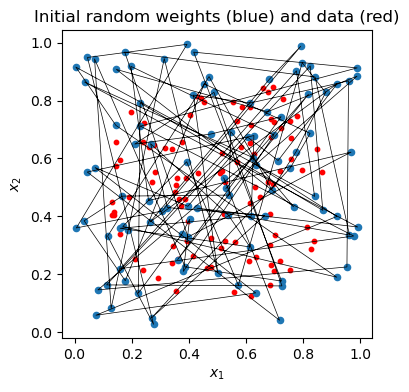

In [8]:
W=np.array([point() for _ in range(num_neurons)])

plt.figure(figsize=(4,4))
plt.title("Initial random weights (blue) and data (red)")
plt.scatter(data[:,0],data[:,1],s=10,c='r')
plt.plot(W[:,0],W[:,1],linewidth=0.5, c='k')
plt.scatter(W[:,0],W[:,1],s=20)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

#### SOM settings, training and display of final grid over the 2D data

In [6]:
eps = 0.5   # initial learning rate
eps_dec = 0.98 # learning rate decrease
de = 10  # initial neighborhood distance
de_dec = 0.95  # neighborhood distance decrease
step_counter = 0

epochs = 150 # number of training epochs

for _ in range(epochs):             
    eps=eps*eps_dec           
    de=de*de_dec         
    
    for i in range(num_data):      
        p=data[i] # change this to p=point_c() or p=point() to sample a new random point each time
        step_counter=step_counter+1
        dist=[eucl(p,W[k]) for k in range(num_neurons)] 
        ind_min = np.argmin(dist)
        
        for k in range(num_neurons): 
            W[k]+=eps*phi(ind_min,k,de)*(p-W[k]) 

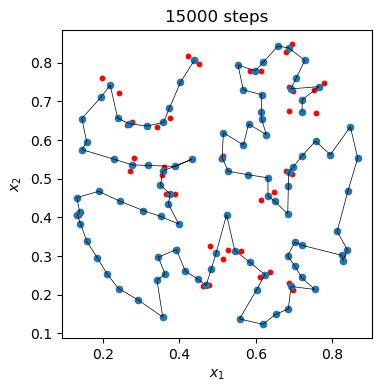

In [7]:
plt.figure(figsize=(4,4))
plt.title(str(step_counter)+" steps")
plt.scatter(data[:,0],data[:,1],s=10,c='r')
plt.plot(W[:,0],W[:,1],linewidth=0.5, c='k')
plt.scatter(W[:,0],W[:,1],s=20)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()  

#### SOM training and animated display of the grid over training steps 

Before running the cell below, we have to re-initialize the SOM weights running the cell "Initializing and displyaing the data".

epoch n: 0
epoch n: 1
epoch n: 2
epoch n: 3
epoch n: 4
epoch n: 5
epoch n: 6
epoch n: 7
epoch n: 8
epoch n: 9
epoch n: 10
epoch n: 11
epoch n: 12
epoch n: 13
epoch n: 14
epoch n: 15
epoch n: 16
epoch n: 17
epoch n: 18
epoch n: 19
epoch n: 20
epoch n: 21
epoch n: 22
epoch n: 23
epoch n: 24
epoch n: 25
epoch n: 26
epoch n: 27
epoch n: 28
epoch n: 29
epoch n: 30
epoch n: 31
epoch n: 32
epoch n: 33
epoch n: 34
epoch n: 35
epoch n: 36
epoch n: 37
epoch n: 38
epoch n: 39
epoch n: 40
epoch n: 41
epoch n: 42
epoch n: 43
epoch n: 44
epoch n: 45
epoch n: 46
epoch n: 47
epoch n: 48
epoch n: 49
epoch n: 50
epoch n: 51
epoch n: 52
epoch n: 53
epoch n: 54
epoch n: 55
epoch n: 56
epoch n: 57
epoch n: 58
epoch n: 59
epoch n: 60
epoch n: 61
epoch n: 62
epoch n: 63
epoch n: 64
epoch n: 65
epoch n: 66
epoch n: 67
epoch n: 68
epoch n: 69
epoch n: 70
epoch n: 71
epoch n: 72
epoch n: 73
epoch n: 74
epoch n: 75
epoch n: 76
epoch n: 77
epoch n: 78
epoch n: 79
epoch n: 80
epoch n: 81
epoch n: 82
epoch n: 83
ep


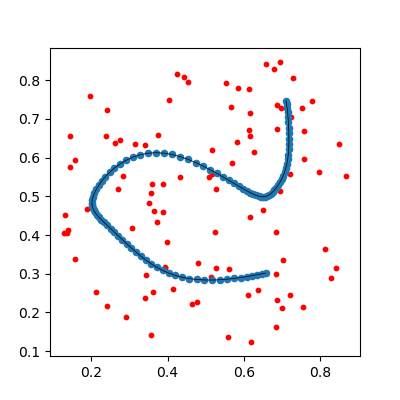

In [11]:
gif_steps = num_data # sample an image for the gif every gif_steps epocs (if too little, this will take too long)

tempdir = './temp'
if os.path.isdir(tempdir):
    for f in os.listdir(tempdir):
        os.remove(os.path.join(tempdir, f))
    os.rmdir(tempdir)

os.makedirs(tempdir)

eps = 0.5   # initial learning rate
eps_dec = 0.98 # learning rate decrease
de = 10  # initial neighborhood distance
de_dec = 0.95  # neighborhood distance decrease
step_counter = 0

epochs = 150 # number of training epochs

for e in range(epochs):             
    eps=eps*eps_dec           
    de=de*de_dec         
    
    print('epoch n:',e)
    
    for i in range(num_data):      
        p=data[i] # change this to p=point_c() or p=point() to sample a new random point each time
        step_counter=step_counter+1
        dist=[eucl(p,W[k]) for k in range(num_neurons)] 
        ind_min = np.argmin(dist)
        
        for k in range(num_neurons): 
            W[k]+=eps*phi(ind_min,k,de)*(p-W[k]) 
    
        if step_counter % gif_steps == 0:
            plt.figure(figsize=(4,4))
            plt.scatter(data[:,0],data[:,1],s=10,c='r')
            plt.plot(W[:,0],W[:,1],linewidth=0.5, c='k')
            plt.scatter(W[:,0],W[:,1],s=20)
            plt.savefig(tempdir+'/image'+str(step_counter)+'.png')
            plt.close()

gif_file = 'out.gif'

with imageio.get_writer(gif_file, mode='I') as writer:
    filenames = glob.glob(tempdir+'/image*'+'.png')
    filenames = natsorted(filenames)
    for filename in filenames:
        image = imageio.v3.imread(filename)
        writer.append_data(image)
        
embed.embed_file(gif_file)

### 3D data and 2D grid example

#### Global settings

In [12]:
num_neurons = 20 # number of neurons on each axis (the total will be num_neurons x num_neurons)
num_data = 20 # number of data points

#### Initializing and displyaing the random data

In this case the 3D data is a set of "colors" (RGB). In the data visualization what it matters is just the presence of colors, not their position or spatial organization.

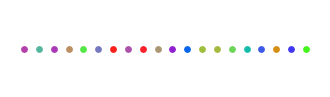

In [13]:
data=[rgbn() for _ in range(num_data)]
pls=plt.figure(figsize=(4,1))
plt.axis('off')
for i in range(num_data): plt.scatter(i,0,color=data[i], s=15); 

#### SOM weights initialization

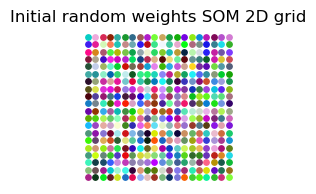

In [17]:
W=np.zeros((num_neurons,num_neurons,3)) 

for i in range(num_neurons):       
    for j in range(num_neurons):     
        for k in range(3):   
            W[i,j,k]=np.random.random()
            
pls=plt.figure(figsize=(2,2))
plt.title("Initial random weights SOM 2D grid")

for i in range(num_neurons):
    for j in range(num_neurons):
        plt.scatter(i,j,color=W[i][j], s=15)
        
plt.axis('off')
plt.xlabel('$i$')
plt.ylabel('$j$');

#### SOM training and display 2D SOM data

In [15]:
eps = 0.5   # initial learning rate
eps_dec = 0.995 # learning rate decrease
de = 20  # initial neighborhood distance
de_dec = 0.96  # neighborhood distance decrease

epochs = 50 # number of training epochs

for e in range(epochs): 
    eps=eps*eps_dec      
    de=de*de_dec
    
    #print('epoch n:',e)
    
    for s in range(num_data):      
        p=data[s]      
        dist=[[dist3(p,W[i][j]) for j in range(num_neurons)] for i in range(num_neurons)] 
                        
        ind_min = np.argmin(dist) 
        ind_1=ind_min//num_neurons       
        ind_2=ind_min%num_neurons

        for j in range(num_neurons): 
            for i in range(num_neurons):
                W[i][j]+=eps*phi2(ind_1,ind_2,i,j,de)*(p-W[i][j]) 

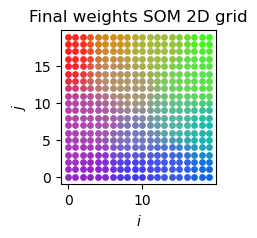

In [16]:
pls=plt.figure(figsize=(2,2))
plt.title("Final weights SOM 2D grid")
plt.xlabel('$i$')
plt.ylabel('$j$')

for i in range(num_neurons):
    for j in range(num_neurons):
        plt.scatter(i,j,color=W[i][j], s=15)
        

#### SOM training and animated display of the grid over training steps 

Before running the cell below, we have to re-initialize the SOM weights running the cell " SOM weights initialization".

epoch n: 0
epoch n: 1
epoch n: 2
epoch n: 3
epoch n: 4
epoch n: 5
epoch n: 6
epoch n: 7
epoch n: 8
epoch n: 9
epoch n: 10
epoch n: 11
epoch n: 12
epoch n: 13
epoch n: 14
epoch n: 15
epoch n: 16
epoch n: 17
epoch n: 18
epoch n: 19
epoch n: 20
epoch n: 21
epoch n: 22
epoch n: 23
epoch n: 24
epoch n: 25
epoch n: 26
epoch n: 27
epoch n: 28
epoch n: 29
epoch n: 30
epoch n: 31
epoch n: 32
epoch n: 33
epoch n: 34
epoch n: 35
epoch n: 36
epoch n: 37
epoch n: 38
epoch n: 39
epoch n: 40
epoch n: 41
epoch n: 42
epoch n: 43
epoch n: 44
epoch n: 45
epoch n: 46
epoch n: 47
epoch n: 48
epoch n: 49



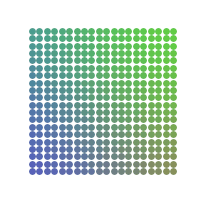

In [18]:
gif_steps = num_data # sample an image for the gif every gif_steps epocs (if too little, this will take too long)

tempdir = './temp'
if os.path.isdir(tempdir):
    for f in os.listdir(tempdir):
        os.remove(os.path.join(tempdir, f))
    os.rmdir(tempdir)

os.makedirs(tempdir)

eps = 0.5   # initial learning rate
eps_dec = 0.995 # learning rate decrease
de = 20  # initial neighborhood distance
de_dec = 0.96  # neighborhood distance decrease

epochs = 50 # number of training epochs
step_counter = 0

for e in range(epochs): 
    eps=eps*eps_dec      
    de=de*de_dec
    
    print('epoch n:',e)
    
    for s in range(num_data):
        step_counter = step_counter + 1
        p=data[s]      
        dist=[[dist3(p,W[i][j]) for j in range(num_neurons)] for i in range(num_neurons)] 
                        
        ind_min = np.argmin(dist) 
        ind_1=ind_min//num_neurons       
        ind_2=ind_min%num_neurons

        for j in range(num_neurons): 
            for i in range(num_neurons):
                W[i][j]+=eps*phi2(ind_1,ind_2,i,j,de)*(p-W[i][j]) 
    
        if step_counter % gif_steps == 0:
            plt.figure(figsize=(2,2))
            for i in range(num_neurons):
                for j in range(num_neurons):
                    plt.scatter(i,j,color=W[i][j], s=15)

            plt.axis('off')  
            plt.savefig(tempdir+'/image'+str(step_counter)+'.png')
            plt.close()

gif_file = 'out.gif'

with imageio.get_writer(gif_file, mode='I') as writer:
    filenames = glob.glob(tempdir+'/image*'+'.png')
    filenames = natsorted(filenames)
    for filename in filenames:
        image = imageio.v3.imread(filename)
        writer.append_data(image)
        
embed.embed_file(gif_file)

### 2D data and 2D grid example

#### Global settings

In [19]:
n = 10 # number of neurons on each axis (the total will be n x n)
num_data = 100 # number of data points

#### Initializing and displyaing the random data

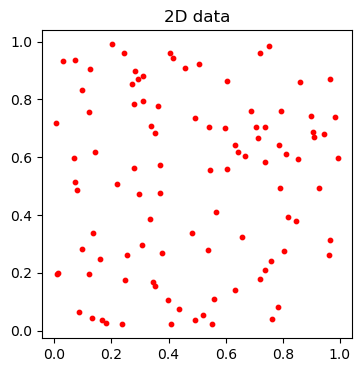

In [20]:
data = np.array([point() for i in range(num_data)])


# the commented code below creates and concatenates multiple groups of data points, you can change the constant numbers
# data = np.empty([0,2])
# temp = np.array([point_c()*0.5 for i in range(50)])
# data = np.vstack([data, temp])
# temp = np.array([point()*0.2 + np.array([-0.5, 0.3]) for i in range(50)])
# data = np.vstack([data, temp])
# temp = np.array([point()*0.3 + np.array([+0.5, -0.7]) for i in range(50)])
# data = np.vstack([data, temp])
# temp = np.array([point_c()*0.15 + np.array([-0.2, -0.4]) for i in range(50)])
# data = np.vstack([data, temp])
# num_data=data.shape[0]


plt.figure(figsize=(4,4))
plt.scatter(data[:,0],data[:,1],s=10,c='r')
plt.title("2D data") 
plt.show()

#### SOM weights initialization

Text(0, 0.5, '$x_2$')

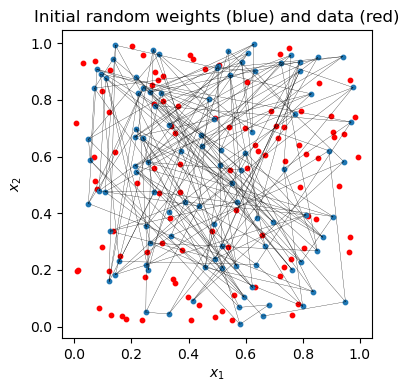

In [26]:
W=np.array([point() for _ in range(n*n)])

plt.figure(figsize=(4,4))
plt.title("Initial random weights (blue) and data (red)")

plt.scatter(data[:,0],data[:,1],s=10,c='r')

plt.scatter(W[:,0],W[:,1],s=10)

for j in range(n):        
    for i in range(n-1):  
        plt.plot([W[i+n*j,0],W[i+1+n*j,0]],[W[i+n*j,1],W[i+1+n*j,1]],
                 linewidth=.2,c='black')

for j in range(n-1):       
    for i in range(n):    
        plt.plot([W[i+n*j,0],W[i+n*(j+1),0]],[W[i+n*j,1],W[i+n*(j+1),1]],
                 linewidth=.2,c='black')
         
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

#### SOM settings, training and display of final 2D grid over the 2D data

In [22]:
eps = 0.5   # initial learning rate
eps_dec = 0.97 # learning rate decrease
de = 3   # initial neighborhood distance
de_dec = 0.98 # neighborhood distance decrease
step_counter = 0 

epochs = 50 # number of epochs

for _ in range(epochs):
    eps=eps*eps_dec      
    de=de*de_dec         
    for i in range(num_data):
        step_counter=step_counter+1
        p=data[i] # change this to p=point_c() or p=point() to sample a new random point each time
        dist=[eucl(p,W[l]) for l in range(n*n)] 
        ind_min = np.argmin(dist) 
        ind_i=ind_min%n
        ind_j=ind_min//n       
        
        for j in range(n): 
            for i in range(n):
                W[i+n*j]+=eps*phi2(ind_i,ind_j,i,j,de)*(p-W[i+n*j]) 

Text(0, 0.5, '$x_2$')

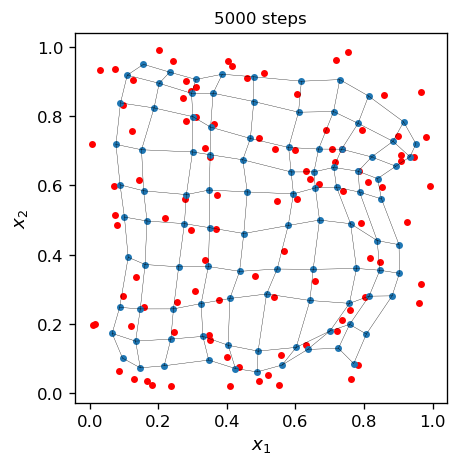

In [23]:
fl=plt.figure(figsize=(4,4),dpi=120)
plt.title(str(step_counter)+" steps",fontsize=10) 

plt.scatter(data[:,0],data[:,1],s=10,c='r')

plt.scatter(W[:,0],W[:,1],s=10)

for j in range(n):        
    for i in range(n-1):  
        plt.plot([W[i+n*j,0],W[i+1+n*j,0]],[W[i+n*j,1],W[i+1+n*j,1]],
                 linewidth=.2,c='black')

for j in range(n-1):       
    for i in range(n):    
        plt.plot([W[i+n*j,0],W[i+n*(j+1),0]],[W[i+n*j,1],W[i+n*(j+1),1]],
                 linewidth=.2,c='black')
        
        
plt.xlabel('$x_1$',fontsize=11)
plt.ylabel('$x_2$',fontsize=11)

#### SOM training and animated display of the grid over training steps 

Before running the cell below, we have to re-initialize the SOM weights running the cell "SOM weights initialization".

epoch n: 0
epoch n: 1
epoch n: 2
epoch n: 3
epoch n: 4
epoch n: 5
epoch n: 6
epoch n: 7
epoch n: 8
epoch n: 9
epoch n: 10
epoch n: 11
epoch n: 12
epoch n: 13
epoch n: 14
epoch n: 15
epoch n: 16
epoch n: 17
epoch n: 18
epoch n: 19
epoch n: 20
epoch n: 21
epoch n: 22
epoch n: 23
epoch n: 24
epoch n: 25
epoch n: 26
epoch n: 27
epoch n: 28
epoch n: 29
epoch n: 30
epoch n: 31
epoch n: 32
epoch n: 33
epoch n: 34
epoch n: 35
epoch n: 36
epoch n: 37
epoch n: 38
epoch n: 39
epoch n: 40
epoch n: 41
epoch n: 42
epoch n: 43
epoch n: 44
epoch n: 45
epoch n: 46
epoch n: 47
epoch n: 48
epoch n: 49



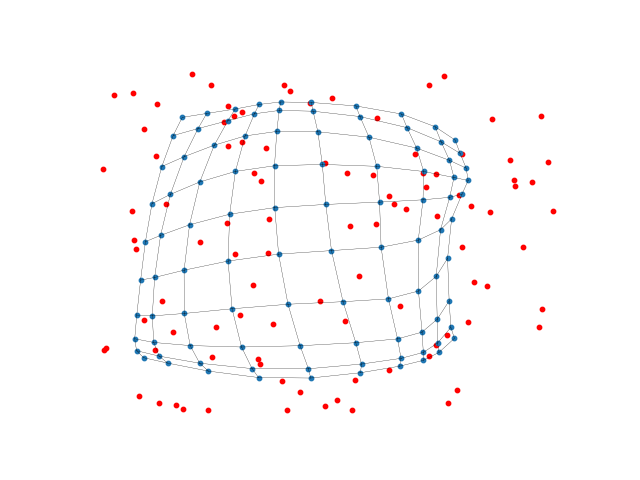

In [27]:
gif_steps = num_data # sample an image for the gif every gif_steps epocs (if too little, this will take too long)

tempdir = './temp'
if os.path.isdir(tempdir):
    for f in os.listdir(tempdir):
        os.remove(os.path.join(tempdir, f))
    os.rmdir(tempdir)

os.makedirs(tempdir)

eps = 0.5   # initial learning rate
eps_dec = 0.97 # learning rate decrease
de = 3   # initial neighborhood distance
de_dec = 0.98 # neighborhood distance decrease
step_counter = 0 

epochs = 50 # number of epochs

for e in range(epochs):
    eps=eps*eps_dec      
    de=de*de_dec
    
    print('epoch n:',e)
    
    for i in range(num_data):
        step_counter=step_counter+1
        p=data[i] # change this to p=point_c() or p=point() to sample a new random point each time
        dist=[eucl(p,W[l]) for l in range(n*n)] 
        ind_min = np.argmin(dist) 
        ind_i=ind_min%n
        ind_j=ind_min//n       
        
        for j in range(n): 
            for i in range(n):
                W[i+n*j]+=eps*phi2(ind_i,ind_j,i,j,de)*(p-W[i+n*j]) 
                
        if step_counter % gif_steps == 0:
            plt.scatter(data[:,0],data[:,1],s=10,c='r')
            plt.scatter(W[:,0],W[:,1],s=10)
            for j in range(n):        
                for i in range(n-1):  
                    plt.plot([W[i+n*j,0],W[i+1+n*j,0]],[W[i+n*j,1],W[i+1+n*j,1]],
                             linewidth=.2,c='black')
            for j in range(n-1):       
                for i in range(n):    
                    plt.plot([W[i+n*j,0],W[i+n*(j+1),0]],[W[i+n*j,1],W[i+n*(j+1),1]],
                             linewidth=.2,c='black')
            plt.axis('off')  
            plt.savefig(tempdir+'/image'+str(step_counter)+'.png')
            plt.close()

gif_file = 'out.gif'

with imageio.get_writer(gif_file, mode='I') as writer:
    filenames = glob.glob(tempdir+'/image*'+'.png')
    filenames = natsorted(filenames)
    for filename in filenames:
        image = imageio.v3.imread(filename)
        writer.append_data(image)
        
embed.embed_file(gif_file)